### 1. Classification with Tree:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics, preprocessing
from sklearn.datasets import load_boston
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### 1.1. Read in data:

In [ ]:
# Go to the directory where the data file is located. 
# os.chdir(r'~~')                # Please, replace the path with your own.   

In [3]:
# Read the already pre-processed data.
df = pd.read_csv('data_titanic_2.csv', header='infer')

In [4]:
df.shape

(889, 21)

In [5]:
df.head(3)

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(21.0, 30.0]","Age_(30.0, 35.0]","Age_(35.0, 80.0]",Survived
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [6]:
X = df.drop(columns=['Survived'])
Y = df.Survived

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 1.2. Tree hyperparameter optimization:

In [25]:
dt = DecisionTreeClassifier()  
dt.fit(X_train, Y_train)  
tree_y_pred=dt.predict(X_test)

In [26]:
print("score:{}".format(metrics.accuracy_score(Y_test, tree_y_pred)))

score:0.7865168539325843


In [40]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [5,6,7,8,9,10,11,12,13],
              'criterion' :['gini', 'entropy']
             }
CVdt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=2)
CVdt.fit(X_train, X_train)


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [41]:
CVdt.best_estimator_

DecisionTreeClassifier(max_depth=12, max_features='log2')

In [42]:
dt2 = DecisionTreeClassifier(max_depth=12, max_features='log2')
dt2.fit(X_train, Y_train)  
tree_y_pred2=dt2.predict(X_test)

In [43]:
print("score:{}".format(metrics.accuracy_score(Y_test, tree_y_pred2)))

score:0.8164794007490637


### 2. Regression with Tree:

#### 2.1. Read in data: 

In [44]:
data = load_boston()

In [45]:
# Display the description on the data.
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [46]:
# The explanatory variables.
X = data['data']
header = data['feature_names']

In [47]:
# The response variable.
# This is a numeric variable representing the house price.
Y = data['target']
Y = Y.reshape(-1, 1)

In [71]:
Y.reshape(Y.shape[0])

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [51]:
header

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

#### 2.2. Convert the data into a DataFrame and explore:

In [184]:
df = pd.DataFrame(data=X,index=np.arange(len(X)),columns=header)

In [185]:
df['target'] = pd.Series(Y.reshape(Y.shape[0]))

In [186]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [187]:
(df.corr()['target']*100).sort_values(ascending=True)

LSTAT      -73.766273
PTRATIO    -50.778669
INDUS      -48.372516
TAX        -46.853593
NOX        -42.732077
CRIM       -38.830461
RAD        -38.162623
AGE        -37.695457
CHAS        17.526018
DIS         24.992873
B           33.346082
ZN          36.044534
RM          69.535995
target     100.000000
Name: target, dtype: float64

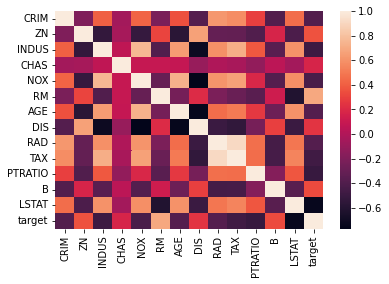

In [174]:
sns.heatmap(df.corr())


In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr_y_pred = lr.predict(X_test)

In [190]:
print(f'Linear Regression r2 score : {metrics.r2_score(Y_test,lr_y_pred)}')
print(f'Linear Regression rmse : {metrics.mean_squared_error(Y_test,lr_y_pred)}')

Linear Regression r2 score : 0.7665382927362879
Linear Regression rmse : 23.964571384956816


#### 2.3. Tree hyperparameter optimization:

In [197]:
dt3 = DecisionTreeRegressor()  
dt3.fit(X_train, Y_train)  
tree_y_pred3=dt3.predict(X_test)

In [196]:
param_grid2 = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [5,6,7,8,9,10,11,12,13]
             }
CVdt2 = GridSearchCV(estimator=dt3, param_grid=param_grid2, cv=2)
CVdt2.fit(X_train, X_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [198]:
CVdt2.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=9,
                      max_features='log2')

In [199]:
dt4 = CVdt2.best_estimator_
dt4.fit(X_train, Y_train)  
tree_y_pred4=dt4.predict(X_test)

In [202]:
print("r2 score:{}".format(metrics.r2_score(Y_test, tree_y_pred4)))
print(f'Linear Regression rmse : {metrics.mean_squared_error(Y_test,tree_y_pred4)}')

r2 score:0.7261194555037518
Linear Regression rmse : 28.113517786098026


NOTE: We can compare the above result with that obtained using linear regression where the RMSE was 5.33.

Hint : 

https://www.youtube.com/watch?v=KzIQ3G_TEFg

https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee


https://www.mygreatlearning.com/blog/gridsearchcv/